In [121]:
# import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
# define fuction to get S&P 500 tickers
def get_sp500_tickers():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    tables = pd.read_html(url, match='Symbol')
    df = tables[0]
    tickers = df['Symbol'].tolist()
    tickers = [ticker.replace('.', '-') for ticker in tickers]
    return tickers

In [123]:
# define function to get S&P 500 company names
def get_sp500_securities():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    tables = pd.read_html(url, match='Symbol')
    df = tables[0]
    securities = df['Security'].tolist()
    return securities

In [124]:
# assign functions as variables
ticker_list = get_sp500_tickers()
securities_list = get_sp500_securities()

In [125]:
# create dictionary mapping tickers to securities
ticker_dict = {ticker: security for ticker, security in zip(ticker_list, securities_list)}

In [126]:
# get S&P 500 data for the last 5 years
sp500_data = yf.download('^GSPC', period='5y', interval='1mo', auto_adjust=True)

# keep only closing price column and date (as index)
sp500_data = sp500_data[['Close']].reset_index()

# rename columns
sp500_data.columns = ['Date', 'Closing Price']

# create new column 'Ticker'
sp500_data['Ticker'] = 'S&P 500'

# reorder columns
sp500_data = sp500_data[['Date', 'Ticker', 'Closing Price']]

[*********************100%***********************]  1 of 1 completed


In [127]:
sp500_data

,Date,Ticker,Closing Price
0,2020-07-01,S&P 500,3271.120117
1,2020-08-01,S&P 500,3500.310059
2,2020-09-01,S&P 500,3363.000000
3,2020-10-01,S&P 500,3269.959961
4,2020-11-01,S&P 500,3621.629883
5,2020-12-01,S&P 500,3756.070068
6,2021-01-01,S&P 500,3714.239990
7,2021-02-01,S&P 500,3811.149902
8,2021-03-01,S&P 500,3972.889893
9,2021-04-01,S&P 500,4181.169922


In [128]:
for ticker in ticker_list:
    # download data for each ticker
    ticker_data = yf.download(ticker, period='5y', interval='1mo', auto_adjust=True)
    
    # keep only closing price column and date (as index)
    ticker_data = ticker_data[['Close']].reset_index()
    
    # rename columns
    ticker_data.columns = ['Date', 'Closing Price']
    
    # create new column 'Ticker'
    ticker_data['Ticker'] = ticker
    
    # reorder columns
    ticker_data = ticker_data[['Date', 'Ticker', 'Closing Price']]
    
    # append to sp500_data
    sp500_data = pd.concat([sp500_data, ticker_data], ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [129]:
sp500_data

,Date,Ticker,Closing Price
0,2020-07-01,S&P 500,3271.120117
1,2020-08-01,S&P 500,3500.310059
2,2020-09-01,S&P 500,3363.000000
3,2020-10-01,S&P 500,3269.959961
4,2020-11-01,S&P 500,3621.629883
...,...,...,...
29939,2025-02-01,ZTS,166.677551
29940,2025-03-01,ZTS,164.096252
29941,2025-04-01,ZTS,155.873993
29942,2025-05-01,ZTS,168.630005


In [130]:
import matplotlib.pyplot as plt
import pandas as pd

def compare_portfolio_to_sp500(sp500_data, portfolio_weights):
    # Normalize closing prices so all series start at 100
    norm_df = sp500_data.copy()
    norm_df['Closing Price'] = norm_df.groupby('Ticker')['Closing Price'].transform(
        lambda x: x / x.iloc[0] * 100
    )

    # Pivot to wide format: rows = dates, columns = tickers
    pivot_df = norm_df.pivot(index='Date', columns='Ticker', values='Closing Price')

    # Validate tickers
    for ticker in portfolio_weights:
        if ticker not in pivot_df.columns:
            raise ValueError(f"Ticker '{ticker}' not found in sp500_data.")

    if 'S&P 500' not in pivot_df.columns:
        raise ValueError("Ticker 'S&P 500' not found in sp500_data. Make sure the benchmark is labeled exactly as 'S&P 500'.")

    # Compute weighted portfolio performance
    portfolio_series = sum(pivot_df[ticker] * weight for ticker, weight in portfolio_weights.items())

    # Benchmark series
    sp500_series = pivot_df['S&P 500']

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(sp500_series, label='S&P 500')
    plt.plot(portfolio_series, label='Your Portfolio')
    plt.title('Your Portfolio vs S&P 500 (Last 5 Years)')
    plt.xlabel('Date')
    plt.ylabel('Normalized Value (Start = 100)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Compute performance difference
    port_return = portfolio_series.iloc[-1]
    sp_return = sp500_series.iloc[-1]
    rel_diff = ((port_return - sp_return) / sp_return) * 100

    message = f"Your portfolio performed {abs(rel_diff):.2f}% {'better' if rel_diff > 0 else 'worse'} than the S&P 500 over the past 5 years."
    return message

In [131]:
# create list og my portfolio tickers
tickers = ['KEYS', 'AAPL', 'AMZN', 'GOOGL', 'MSFT', 'META', 'NVDA', 'AMD', 
           'TSLA', 'V', 'AXP', 'MCD', 'WMT', 'PG']

weight = round(1 / len(tickers), 4)  # ~0.0714
portfolio_weights = {ticker: weight for ticker in tickers}

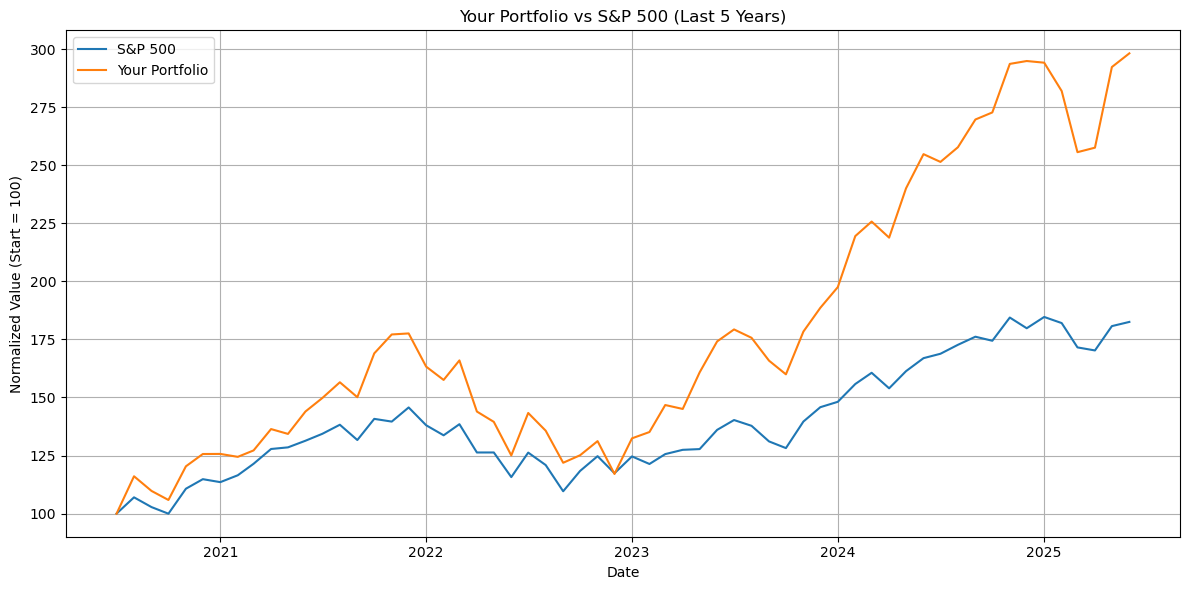

Your portfolio performed 63.35% better than the S&P 500 over the past 5 years.


In [132]:
# display results
result = compare_portfolio_to_sp500(sp500_data, portfolio_weights)
print(result)

In [ ]:
def get_top_n_gainers(sp500_data, top_n=15):
    pivot_df = sp500_data.pivot(index='Date', columns='Ticker', values='Closing Price')
    total_months = len(pivot_df)
    complete_tickers = pivot_df.columns[pivot_df.notna().sum() == total_months]
    filtered_df = pivot_df[complete_tickers]

    start_prices = filtered_df.iloc[0]
    end_prices = filtered_df.iloc[-1]
    percent_gain = (end_prices - start_prices) / start_prices

    top_tickers = percent_gain.sort_values(ascending=False).head(top_n).index.tolist()
    return top_tickers

def get_company_name_lookup():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    tables = pd.read_html(url, match='Symbol')
    df = tables[0]
    df['Symbol'] = df['Symbol'].str.replace('.', '-', regex=False)
    return dict(zip(df['Symbol'], df['Security']))

def compare_portfolio_to_sp500_with_summary(sp500_data, portfolio_weights):
    norm_df = sp500_data.copy()
    norm_df['Closing Price'] = norm_df.groupby('Ticker')['Closing Price'].transform(
        lambda x: x / x.iloc[0] * 100
    )
    pivot_df = norm_df.pivot(index='Date', columns='Ticker', values='Closing Price')

    for ticker in portfolio_weights:
        if ticker not in pivot_df.columns:
            raise ValueError(f"Ticker '{ticker}' not found in sp500_data.")
    if 'S&P 500' not in pivot_df.columns:
        raise ValueError("Ticker 'S&P 500' not found in sp500_data. Make sure the benchmark is labeled exactly as 'S&P 500'.")

    portfolio_series = sum(pivot_df[ticker] * weight for ticker, weight in portfolio_weights.items())
    sp500_series = pivot_df['S&P 500']

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(sp500_series, label='S&P 500')
    plt.plot(portfolio_series, label='Ideal Portfolio')
    plt.title('Ideal Portfolio vs S&P 500 (Last 5 Years)')
    plt.xlabel('Date')
    plt.ylabel('Normalized Value (Start = 100)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Performance difference
    port_return = portfolio_series.iloc[-1]
    sp_return = sp500_series.iloc[-1]
    rel_diff = ((port_return - sp_return) / sp_return) * 100

    # Build output with names
    tickers_list = list(portfolio_weights.keys())
    name_lookup = get_company_name_lookup()
    full_names = [f"{name_lookup.get(t, 'Unknown')} ({t})" for t in tickers_list]

    message = f"The ideal portfolio performed {abs(rel_diff):.2f}% {'better' if rel_diff > 0 else 'worse'} than the S&P 500 over the past 5 years.\n"
    message += f"The top {len(tickers_list)} performing stocks over the past 5 years were: {', '.join(full_names)}.\n"
    message += f"Note: Past performance is not necessarily indicative of future results.\n"
    print(message)

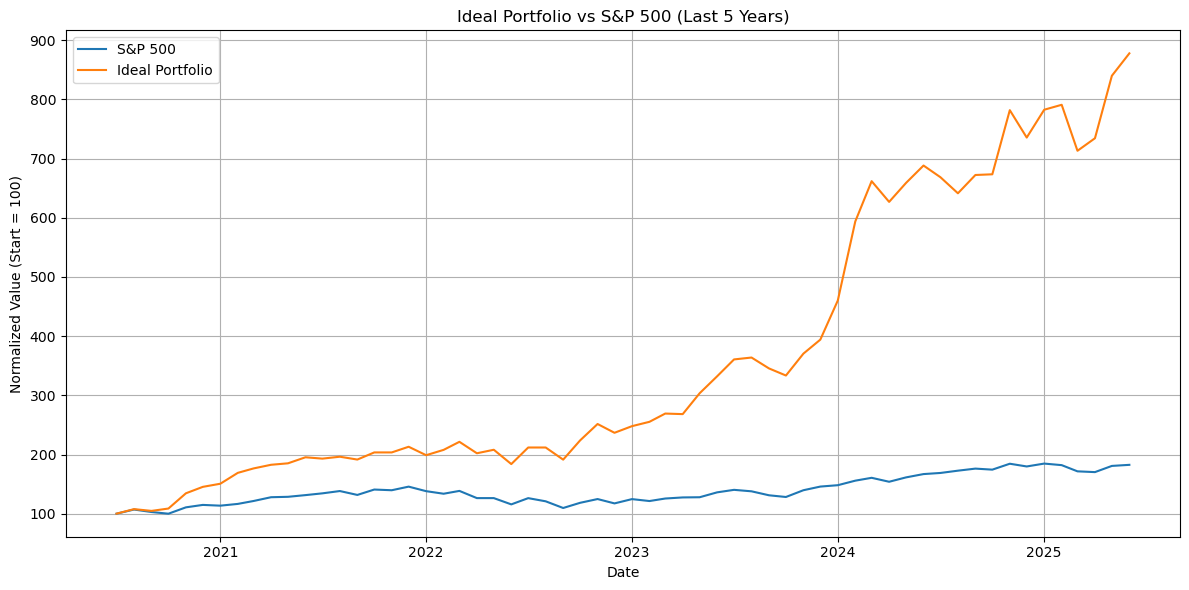

The ideal portfolio performed 380.96% better than the S&P 500 over the past 5 years.
The top 15 performing stocks over the past 5 years were: Supermicro (SMCI), Nvidia (NVDA), Howmet Aerospace (HWM), Vistra Corp. (VST), Targa Resources (TRGP), Axon Enterprise (AXON), Broadcom (AVGO), Quanta Services (PWR), GE Aerospace (GE), Texas Pacific Land Corporation (TPL), Tapestry, Inc. (TPR), Arista Networks (ANET), Royal Caribbean Group (RCL), NRG Energy (NRG), Lilly (Eli) (LLY).
Note: Past performance is not indicative of future results.



In [ ]:
# Run comparison
top_stocks = get_top_n_gainers(sp500_data, top_n=15) # adjust top_n as desired
weight = round(1 / len(top_stocks), 4)
portfolio_weights = {ticker: weight for ticker in top_stocks}
compare_portfolio_to_sp500_with_summary(sp500_data, portfolio_weights)